# SIR Modeling in Python, based on Numberphile 


This notebook is designed to be a bare-bones introudction to SIR modeling in Python. 

I am using the example from Numberphile video: https://www.youtube.com/watch?v=k6nLfCbAzgo where Ben Sparks discusses simple ODE modeling in Geogebra using SIR models as the example.
There is a Geogebra workbook demonstrating this, as in the video, here:  https://www.geogebra.org/classic/aqpv5df7

also taking examples from https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

In [15]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

In the numberphile example, Ben uses transm and recov for beta and gamma, so I have replaced them here. If you want to set it back, just change all transm to beta and all recov to gamma.

In [10]:
N = 1
Istart = 0.01
Sstart = N - Istart
Rstart = 0
transm = 3.25
recov  = 0.30
maxT = 20

t = np.linspace(0, maxT, maxT)

# The SIR model differential equations.
def deriv(SIR, t, N, transm, recov):
    S, I, R = SIR
    dSdt = -transm * S * I 
    dIdt = transm * S * I  - recov * I
    dRdt = recov * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
SIR0 = Sstart, Istart, Rstart
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, SIR0, t, args=(N, transm, recov))
S, I, R = ret.T


In [30]:
plotData = pd.DataFrame(ret.T)
plotData = plotData.transpose()
plotData.columns = ['S','I','R']

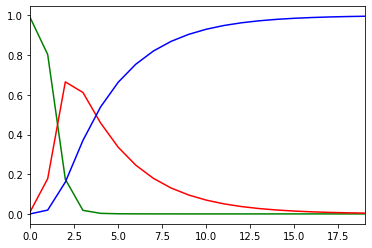

In [36]:
with pd.plotting.plot_params.use('x_compat',True):
    plotData['S'].plot(color='g')
    plotData['I'].plot(color='r')
    plotData['R'].plot(color='b')
